In [42]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, roc_curve, auc
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import seaborn as sns


In [43]:
# Load in the full dataset
df = pd.read_csv("FE_final_data.csv")

df.head()

,Country,Age,Annual_Salary,Gender,Education,Payment_Method_Credit_Debit,Living_Region,Online_Service_Preference,AI_Enhance_Experience,AI_Tools_Used_Chatbots,...,Product_Category_Electronics,Product_Category_Groceries,Product_Category_Personal_Care,Product_Category_Clothing,AI_Trust,AI_Usage,KNNCluster1,KNNCluster2,LDA_Prediction,AI_Satisfaction
0,165,2,3,0,3,0,1,0,1,1,...,1,1,1,1,2,3,0,0,0,1
1,165,1,1,1,2,1,1,0,1,1,...,1,0,0,0,2,3,0,0,1,1
2,165,2,3,1,2,1,11,1,1,0,...,1,1,0,0,2,1,0,0,0,1
3,165,2,4,1,2,1,11,1,1,0,...,1,1,0,1,2,0,0,0,0,1
4,165,1,1,1,2,0,11,1,1,1,...,0,1,0,1,2,1,0,0,0,1


In [44]:

# Split the dataset into training and testing sets (80% - 20% split)
X = df.drop(columns=['AI_Satisfaction'])
y = df['AI_Satisfaction']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# Scaling the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [45]:
# Define the model
model = Sequential()
model.add(Dense(100, activation='relu', input_dim=X_train_scaled.shape[1]))
model.add(Dense(100, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

# Fit the model
history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=512, validation_split=0.33)


Epoch 1/100


C:\Users\RRC\anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 607ms/step - accuracy: 0.1917 - loss: 0.9526 - val_accuracy: 0.4405 - val_loss: 0.7250
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.4307 - loss: 0.7291 - val_accuracy: 0.6786 - val_loss: 0.6463
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.6726 - loss: 0.6411 - val_accuracy: 0.7857 - val_loss: 0.5945
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.8171 - loss: 0.5826 - val_accuracy: 0.8095 - val_loss: 0.5578
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.8466 - loss: 0.5401 - val_accuracy: 0.7976 - val_loss: 0.5308
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.8496 - loss: 0.5082 - val_accuracy: 0.7976 - val_loss: 0.5102
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.8466 - loss: 0.4828 - val_accuracy: 0.7976 - val_loss: 0.4938
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.8466 - loss: 0.4617 - val_accuracy: 0.7976 - val_loss: 0.4801
Epo

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.9440 - loss: 0.1664 - val_accuracy: 0.8333 - val_loss: 0.4307
Epoch 53/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.9410 - loss: 0.1623 - val_accuracy: 0.8333 - val_loss: 0.4474
Epoch 54/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.9440 - loss: 0.1578 - val_accuracy: 0.8333 - val_loss: 0.4355
Epoch 55/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.9410 - loss: 0.1538 - val_accuracy: 0.8214 - val_loss: 0.4524
Epoch 56/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.9440 - loss: 0.1496 - val_accuracy: 0.8333 - val_loss: 0.4404
Epoch 57/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.9499 - loss: 0.1459 - val_accuracy: 0.8214 - val_loss: 0.4586
Epoch 58/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.9440 - loss: 0.1419 - val_accuracy: 0.8333 - val_loss: 0.4456
Epoch 59/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.9499 - loss: 0.1383 - val_accuracy: 0.8214 - val_loss: 0.46

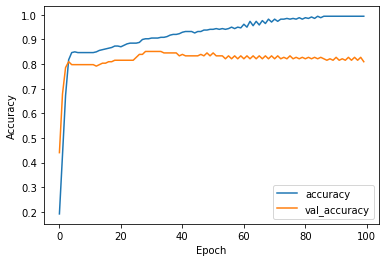

In [46]:
# Plot training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()



In [47]:
# Predict on the test set
predictions = model.predict(X_test_scaled)
predicted_class = (predictions >= 0.5).astype(int)

# Confusion matrix
cm = confusion_matrix(y_test, predicted_class)
print("Confusion Matrix:")
print(cm)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
Confusion Matrix:
[[10 15]
 [ 6 96]]


In [48]:
# Perform PCA on the training features (similar to the R code)
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Create a new model for PCA-reduced data
model2 = Sequential()
model2.add(Dense(100, activation='relu', input_dim=X_train_pca.shape[1]))
model2.add(Dropout(0.2))
model2.add(Dense(100, activation='relu'))
model2.add(Dropout(0.2))
model2.add(Dense(10, activation='relu'))
model2.add(Dropout(0.2))
model2.add(Dense(1, activation='sigmoid'))



C:\Users\RRC\anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [49]:
# Compile the second model
model2.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Fit the second model with early stopping
history_pca = model2.fit(X_train_pca, y_train, epochs=100, batch_size=512, validation_split=0.33, callbacks=[early_stopping])



Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 748ms/step - accuracy: 0.7375 - loss: 0.6319 - val_accuracy: 0.7976 - val_loss: 0.5804
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.8319 - loss: 0.5597 - val_accuracy: 0.7976 - val_loss: 0.5354
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.8319 - loss: 0.5138 - val_accuracy: 0.7976 - val_loss: 0.5036
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.8348 - loss: 0.4894 - val_accuracy: 0.7976 - val_loss: 0.4828
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.8378 - loss: 0.4597 - val_accuracy: 0.7976 - val_loss: 0.4667
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.8407 - loss: 0.4250 - val_accuracy: 0.7976 - val_loss: 0.4549
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.8319 - loss: 0.4190 - val_accuracy: 0.7976 - val_loss: 0.4458
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.8378 - loss: 0.4172 - val_accuracy: 0.7976 - val_loss

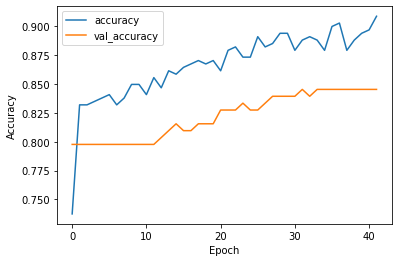

In [50]:
# Plot training history for PCA model
plt.plot(history_pca.history['accuracy'], label='accuracy')
plt.plot(history_pca.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()



In [51]:
# Predict on the test set using PCA-reduced data
predictions_pca = model2.predict(X_test_pca)
predicted_class_pca = (predictions_pca >= 0.5).astype(int)

# Confusion matrix for PCA model
cm_pca = confusion_matrix(y_test, predicted_class_pca)
print("Confusion Matrix for PCA Model:")
print(cm_pca)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
Confusion Matrix for PCA Model:
[[ 8 17]
 [ 3 99]]


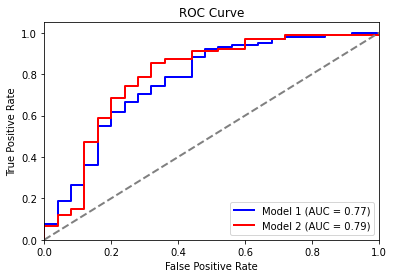

In [52]:


# ROC Curve and AUC
fpr, tpr, _ = roc_curve(y_test, predictions)
roc_auc = auc(fpr, tpr)

fpr_pca, tpr_pca, _ = roc_curve(y_test, predictions_pca)
roc_auc_pca = auc(fpr_pca, tpr_pca)

# Plot ROC curves
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'Model 1 (AUC = {roc_auc:.2f})')
plt.plot(fpr_pca, tpr_pca, color='red', lw=2, label=f'Model 2 (AUC = {roc_auc_pca:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()